In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

Generate training data.

In [3]:
x_class_0 = np.arange(2, 6, 0.2)
y_class_0 = 1 + (np.random.normal(0, 1, len(x_class_0))) * 2

x_class_1 = np.arange(14, 18, 0.2)
y_class_1 = 1 + (np.random.normal(0, 1, len(x_class_1))) * 2

x_class_2 = np.arange(7, 12, 0.2)
y_class_2 = 14 + (np.random.normal(0, 1, len(x_class_2))) * 2

x = np.concatenate([x_class_0, x_class_1, x_class_2])
y = np.concatenate([y_class_0, y_class_1, y_class_2])

classes_0 = np.zeros((len(x_class_0)))
classes_1 = np.zeros((len(x_class_1))) + 1
classes_2 = np.zeros((len(x_class_2))) + 2

classes = np.concatenate([classes_0, classes_1, classes_2])

train_data = np.column_stack((x, y, classes))

Plot training data.

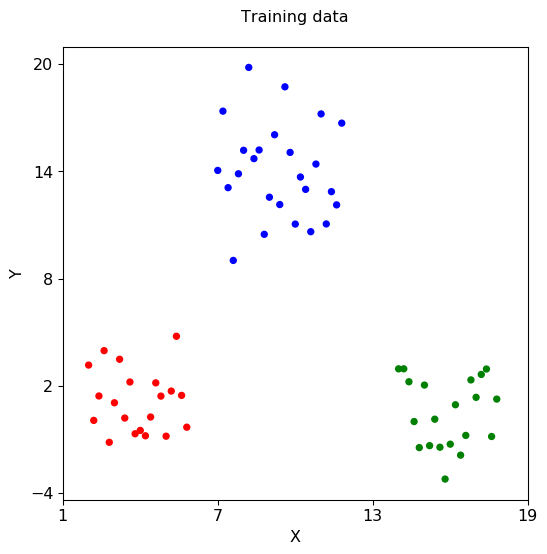

In [4]:
colors = ['r', 'g', 'b']
f = lambda x: colors[int(x)]
colors_train = list(map(f, classes))

my_dpi = 96
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)

plt.scatter(x, y, color=colors_train, s=20)

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Training data\n', fontsize=12)

plt.xticks(np.arange(1, 20, 6), fontsize=12)
plt.yticks(np.arange(-4, 21, 6), fontsize=12)

plt.show()

Learn the prior P(Y) from data.

In [5]:
def learn_prior(data, K):
    p = np.ones((K))
    nrow = data.shape[0]
    for k in np.arange(K):
        p[k] = np.sum(data[:, -1] == k) / nrow
    return p

learned_prior = learn_prior(train_data, 3)

Learn (J * K) univariate Gaussians, one Gaussian for each pair (Xj,k) of input variable Xj and class k.

In [6]:
def learn_gaussians(train_data, J, K):
    mean = np.zeros(J*K).reshape((J,K))
    variance = np.zeros(J*K).reshape((J,K))
    classes = train_data[:, -1]
    for j in np.arange(J):
        for k in np.arange(K):
            mean[j,k] = np.sum(train_data[classes==k,j]) / np.sum(classes == k)
            variance[j,k] = np.sum((train_data[classes==k,j] - mean[j,k])**2) / (np.sum(classes == k) - 1)  
    return mean, variance

J = 2 # two input variables
K = 3 # three output classes

learned_gaussians = learn_gaussians(train_data, J, K)
gauss_mean = learned_gaussians[0]
gauss_variance = learned_gaussians[1]

Likelihood function P(xi|Y=k) for one data point xi and a given class k.

In [7]:
def learn_likelihood(xi, k):
    product_of_gaussians = 1
    for j in np.arange(J):
        gaussian_ = scipy.stats.norm.pdf(xi[j], gauss_mean[j,k], np.sqrt(gauss_variance[j,k]))
        product_of_gaussians = product_of_gaussians * gaussian_
    return product_of_gaussians

Compute the posterior P(Y|xi) for one data point xi, for each class k.

In [8]:
def learn_posterior(xi, K):
    post = np.zeros((K))
    for k in np.arange(K):
        post[k] = learned_prior[k] * learn_likelihood(xi, k)     
    return post

Generate test data.

In [9]:
x_test = np.arange(0, 20, 0.2)
y_test = 3 + (np.random.normal(0, 1, len(x_test))) * 12

data_test = np.column_stack((x_test, y_test))

Classify test data with the learned Gaussian naive Bayesian classifier.

In [10]:
classes_test = np.ones((len(x_test)))
for i in np.arange(data_test.shape[0]):
    post = learn_posterior(data_test[i,:], K)
    classes_test[i] = (np.where(post == np.max(post)))[0][0]

colors_test = list(map(f, classes_test))

Plot the classified test data.

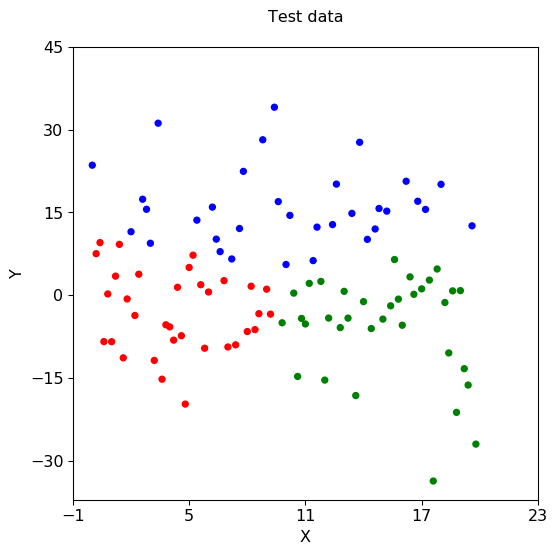

In [11]:
plt.figure(figsize=(600/my_dpi, 600/my_dpi), dpi=my_dpi)

plt.scatter(x_test, y_test, color=colors_test, s=20)

plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Test data\n', fontsize=12)

plt.xticks(np.arange(-1, 24, 6), fontsize=12)
plt.yticks(np.arange(-30, 46, 15), fontsize=12)

plt.show()